# Creating a SVM to predict the probabilities a team has of winning

## Importing the data

In [3]:
import numpy as np
from sklearn.svm import SVC

In [4]:
dataset = np.load('dataset.npy', allow_pickle=True)
classes = np.load('classifications.npy', allow_pickle=True)

In [13]:
print(dataset.shape)
print(classes.shape)

(53013, 350)
(53013,)


## Creating the SVM

In [19]:
SVM = SVC(gamma='auto', probability=True)  # use standard parameters for now
SVM.fit(dataset, classes)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

For testing purposes, lets create a vector with random heroes/bans and a random map and lets see the result

In [20]:
test_vector = np.zeros(350)

It needs to have 5 1's in the first 84 positions, 3 1's in the second 84 positions, then 5 in the next 84 and then 3 in the next 84. Finally, only one 1 in the last 14 positions.

In [21]:
test_vector[10] = 1
test_vector[20] = 1
test_vector[30] = 1
test_vector[40] = 1
test_vector[50] = 1
test_vector[90] = 1
test_vector[100] = 1
test_vector[110] = 1
test_vector[180] = 1
test_vector[190] = 1
test_vector[200] = 1
test_vector[210] = 1
test_vector[220] = 1
test_vector[290] = 1
test_vector[300] = 1
test_vector[310] = 1
test_vector[340] = 1

In [50]:
SVM.predict_proba(test_vector.reshape(1, -1))

array([[0.56721385, 0.43278615]])

As we can see, the model predicts a probability for each of the teams to be a winner, just as we expected.

Now, lets see how does the model does predicting our dataset. We shouldn't use the same data for this, but due to training times (above two or three hours per SVM), we won't be re-training the model, and will just use the same data to test it.

In [29]:
SVM.score(dataset[:5000], classes[:5000])

0.5246

As we can see, we got an accuracy of 0.5246, which is not bad actually, considering that we are using the standard parameters. This value can probably be improved considerably if we do some parameter-tuning. Sadly, this would take too long, so it will be considered as future-work.

## Re - making our hero mapping to the vectors (taken from `./Vectorization.ipynb`)

In [39]:
import json

with open('../Preprocessing/hero_names.json', 'r') as file:
    heroes = json.load(file)
heroes = heroes.keys()
n_heroes = len(heroes)

def map_generator():
    i = 0
    while True:
        yield i
        i += 1

generator = map_generator()
vectorization = {key:next(generator) for key in heroes}
vectorization

{'Abathur': 0,
 'Alarak': 1,
 "Anub'arak": 2,
 'Artanis': 3,
 'Arthas': 4,
 'Auriel': 5,
 'Azmodan': 6,
 'Brightwing': 7,
 'Cassia': 8,
 'Chen': 9,
 'Cho': 10,
 'Chromie': 11,
 'D.Va': 12,
 'Dehaka': 13,
 'Diablo': 14,
 'E.T.C.': 15,
 'Falstad': 16,
 'Gall': 17,
 'Garrosh': 18,
 'Gazlowe': 19,
 'Genji': 20,
 'Greymane': 21,
 "Gul'dan": 22,
 'Illidan': 23,
 'Jaina': 24,
 'Johanna': 25,
 "Kael'thas": 26,
 'Kerrigan': 27,
 'Kharazim': 28,
 'Leoric': 29,
 'Li Li': 30,
 'Li-Ming': 31,
 'Lt. Morales': 32,
 'Lucio': 33,
 'Lunara': 34,
 'Malfurion': 35,
 'Malthael': 36,
 'Medivh': 37,
 'Muradin': 38,
 'Murky': 39,
 'Nazeebo': 40,
 'Nova': 41,
 'Probius': 42,
 'Ragnaros': 43,
 'Raynor': 44,
 'Rehgar': 45,
 'Rexxar': 46,
 'Samuro': 47,
 'Sgt. Hammer': 48,
 'Sonya': 49,
 'Stitches': 50,
 'Stukov': 51,
 'Sylvanas': 52,
 'Tassadar': 53,
 'The Butcher': 54,
 'The Lost Vikings': 55,
 'Thrall': 56,
 'Tracer': 57,
 'Tychus': 58,
 'Tyrael': 59,
 'Tyrande': 60,
 'Uther': 61,
 'Valeera': 62,
 'Valla': 63,

## Testing how little changes in the vector affect the prediction
Let's build two teams, and test their winrates, and then, make little changes to the vector

In [45]:
t1 = np.zeros(84)  # picks
t2 = np.zeros(84)  # picks
t1b = np.zeros(84)  # bans
t2b = np.zeros(84)  # bans
chosen_map = np.zeros(14)
chosen_map[5] = 1  # Use a random map

Lets use a team 1 of: Diablo, Blaze, Tyrande, Thrall and Kael'thas.
Team 2 of: Muradin, Yrel, Malfurion, Li-ming and Genji

In [46]:
for i in ['Diablo', 'Blaze', 'Tyrande', 'Thrall', "Kael'thas"]:
    t1[vectorization[i]] = 1
for i in ['Muradin', 'Yrel', 'Malfurion', 'Li-Ming', 'Genji']:
    t2[vectorization[i]] = 1
for i in ["Mal'Ganis", "Orphea", "Deckard"]:
    t1b[vectorization[i]] = 1
for i in ["Whitemane", "Artanis", "Zeratul"]:
    t2b[vectorization[i]] = 1

In [47]:
vector = np.concatenate([t1, t1b, t2, t2b, chosen_map])
SVM.predict_proba(vector.reshape(1, -1))

array([[0.5, 0.5]])

Now, let's make a little change. Let's change Genji, for Tracer, which are two pretty similar heroes, and let's see how this affects the predictions

In [49]:
t2[vectorization['Genji']] = 0
t2[vectorization['Tracer']] = 1
vector = np.concatenate([t1, t1b, t2, t2b, chosen_map])
SVM.predict_proba(vector.reshape(1, -1))

array([[0.5, 0.5]])

As we can see, the probabilities didn't actually change. This isn't bad, as we were using two team compositions that are pretty equal, consireding the normal standards of the game, and we exchanged two heroes that are considered similar in the role they fulfill, and their efectiveness.

## Testing how the prediction changes when only the map changes, while keeping the teams constant
Now, let's see what happens when we change the map used, but keeping the teams exactly the same.

In [55]:
results = []
for i in range(14):
    map_vector = np.zeros(14)
    map_vector[i] = 1
    vector = np.concatenate([t1, t1b, t2, t2b, map_vector])
    prob = SVM.predict_proba(vector.reshape(1, -1))
    results.append(prob)
    print(prob)

[[0.50641594 0.49358406]]
[[0.5 0.5]]
[[0.50749401 0.49250599]]
[[0.50622028 0.49377972]]
[[0.46823129 0.53176871]]
[[0.5 0.5]]
[[0.50711368 0.49288632]]
[[0.48155028 0.51844972]]
[[0.5 0.5]]
[[0.50673778 0.49326222]]
[[0.50848489 0.49151511]]
[[0.51379573 0.48620427]]
[[0.49490537 0.50509463]]
[[0.4886371 0.5113629]]


Here, we see some pretty interesting things. The win probability for each team, even tho we kept the teams constant, varies when we change the map, meaning that our model is recognizing that some heroes, and some compositions of heroes are better in certain maps than others.

Let's visualize this change in winrate depending on the map

In [57]:
data = [i[0][0] for i in results]
data

[0.5064159376786378,
 0.5,
 0.5074940077889579,
 0.5062202751042052,
 0.46823129360588006,
 0.5,
 0.5071136765916001,
 0.4815502773581985,
 0.5,
 0.5067377803891185,
 0.5084848949693364,
 0.5137957329259407,
 0.4949053653598266,
 0.4886370994011315]

<IPython.core.display.Javascript object>


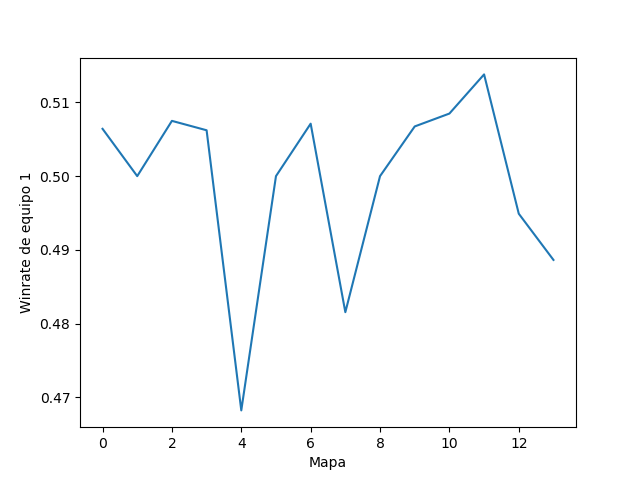

Text(0,0.5,'Winrate de equipo 1')

In [61]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(range(14), data)
plt.xlabel('Mapa')
plt.ylabel('Winrate de equipo 1')

## Testing according to winrate
In this section, we will test how our model predicts when it takes a team of five high-winrate (according to [Hotslogs](https://www.hotslogs.com/Default)) heroes, but with a weird team-composition (like five tanks, or five supports, or five assassins), against a team of five low-winrate heroes, but with a *good* team composition (a tank, a bruiser, an assassin, a support and a filler).

In [74]:
t1 = np.zeros(84)  # picks
t2 = np.zeros(84)  # picks
t1b = np.zeros(84)  # bans
t2b = np.zeros(84)  # bans

for i in ['Cho', 'Gall', 'Probius', 'Samuro', "Zagara"]:
    t1[vectorization[i]] = 1
for i in ['Blaze', 'Chen', 'Deckard', 'Li-Ming', 'Genji']:
    t2[vectorization[i]] = 1
for i in ["Mal'Ganis", "Orphea", "Malfurion"]:
    t1b[vectorization[i]] = 1
for i in ["Whitemane", "Artanis", "Zeratul"]:
    t2b[vectorization[i]] = 1

<IPython.core.display.Javascript object>


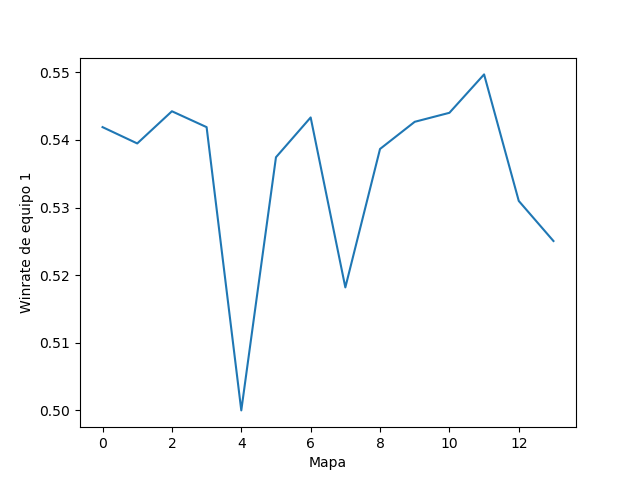

Text(0,0.5,'Winrate de equipo 1')

In [76]:
results = []
for i in range(14):
    map_vector = np.zeros(14)
    map_vector[i] = 1
    vector = np.concatenate([t1, t1b, t2, t2b, map_vector])
    prob = SVM.predict_proba(vector.reshape(1, -1))
    results.append(prob)

data = [i[0][0] for i in results]
data
    
plt.plot(range(14), data)
plt.xlabel('Mapa')
plt.ylabel('Winrate de equipo 1')

As we can see, using a, traditionally, *bad* team composition, but with higher winrate heroes, results in the model giving this team a higher win prediction than using a *good* team composition, but with low winrate heroes.

This tells us that the model, at least, is capable of getting the information of which heroes win more than others, and will sugest that using those heroes will give you a higher probability of winning.